## Installing Qiskit Libraries

In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
     |████████████████████████████████| 19.2 MB 231 kB/s 
     |████████████████████████████████| 240 kB 54.9 MB/s 
     |████████████████████████████████| 106 kB 49.3 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 943 kB 42.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 4.0 MB 40.6 MB/s 
     |████████████████████████████████| 1.9 MB 26.2 MB/s 
     |████████████████████████████████| 112 kB 49.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=d971868a9d08d3bb9c8c82b4054bc69aaf4dabde3045c9508630dbe096ea389a
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/25714

## Importng Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import qiskit
from qiskit.providers.aer.noise import NoiseModel,QuantumError,amplitude_damping_error,depolarizing_error, coherent_unitary_error,pauli_error
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
# from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter,TensoredMeasFitter

## Data Load and Visualization

> Load the Dataset


> Split the dataset in Train and Test data


> Plot the Training data

In [ ]:
#Load the Dataset
data, target = datasets.load_iris(return_X_y=True)

#Split the the as 80% Training data and 20% Testing data 
sample_train, sample_test, label_train, label_test = train_test_split(data, target, test_size=0.2, random_state=42)

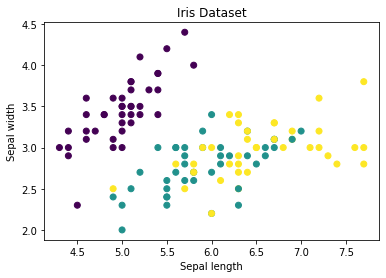

In [ ]:
#Plotting the train dataset with respect to Sepal length and sepal width and color all the points based on their labels
plt.scatter(sample_train[:, 0], sample_train[:, 1], c=label_train)

#Provide the plot title, x-axis name and y-axis name
plt.title("Iris Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

#Visualize the plot
plt.show()

# **Quantum Machine Learning**

> Feature Map:

> Entanglement:

> Quantum Kernel:





> For each Feature Map, Entanglement and Repititions we generate the Data Encoding followed by creating Quantum Kernel with QASM-Simulator for train SVC Model with the train dataset, calculate the accuracy on test dataset and store corresponding accuracy for analysis.

> We visualize the accuracy of each model for analysis, and understand the impacts of number of repitations, entanglements in SVC Model further and conclude the best model for this train dataset.

In [ ]:
reps=[i for i in range(1,5)]
feature_maps=[ZZFeatureMap, PauliFeatureMap]
entanglements=["linear", "circular", "full"]
zz_set=[]
pauli_set=[]
z_set=[]
for fm in feature_maps:
    for entanglement in entanglements:
        temp=[]
        
        for rep in reps:
            feature_map = fm(feature_dimension=4, reps=rep, entanglement=entanglement)
            backend = QuantumInstance(BasicAer.get_backend("qasm_simulator"), shots=1024)

            kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
            svc = SVC(kernel=kernel.evaluate)
            svc.fit(sample_train, label_train)
            svc_score = svc.score(sample_test, label_test)
            temp.append(svc_score)
        
        if fm==ZZFeatureMap:
            zz_set.append(temp)
        else:
            pauli_set.append(temp)
            
for rep in reps:
    feature_map = ZFeatureMap(feature_dimension=4, reps=rep)
    backend = QuantumInstance(BasicAer.get_backend("qasm_simulator"), shots=1024)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(sample_train, label_train)
    svc_score = svc.score(sample_test, label_test)
    z_set.append(svc_score)



#### Plot each model performance with number of entanglements, feature maps and repitions for visualization and analysis

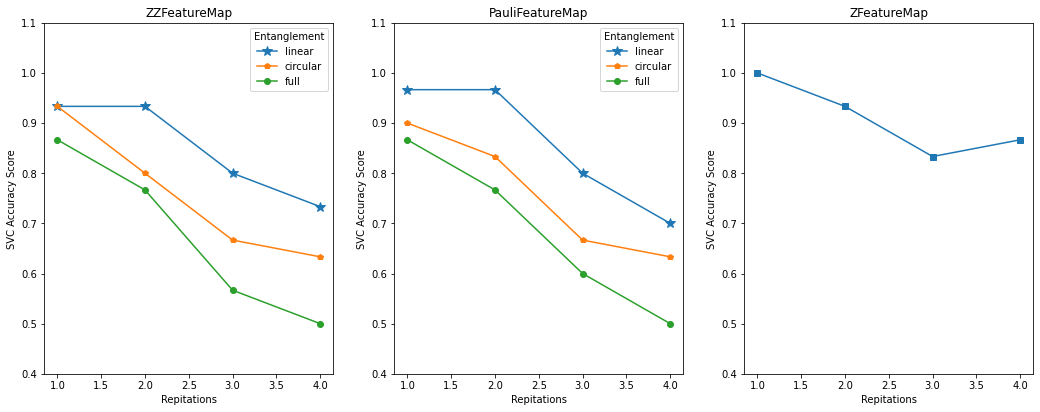

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 6))
fig.tight_layout(pad=3)

axs[0].plot(reps, zz_set[0], label="linear", marker="*", markersize=10)
axs[0].plot(reps, zz_set[1], label="circular", marker="p")
axs[0].plot(reps, zz_set[2], label="full", marker="o")
axs[0].axis(ymin=0.4, ymax=1.1)
axs[0].legend(title = "Entanglement")
axs[0].set(title="ZZFeatureMap", xlabel="Repitations", ylabel="SVC Accuracy Score")

axs[1].plot(reps, pauli_set[0], label="linear" , marker="*", markersize=10)
axs[1].plot(reps, pauli_set[1], label="circular" , marker="p")
axs[1].plot(reps, pauli_set[2], label="full", marker="o")
axs[1].axis(ymin=0.4, ymax=1.1)
axs[1].legend(title = "Entanglement")
axs[1].set(title="PauliFeatureMap", xlabel="Repitations", ylabel="SVC Accuracy Score")

axs[2].plot(reps, z_set, marker="s")
axs[2].axis(ymin=0.4, ymax=1.1)
axs[2].set(title="ZFeatureMap", xlabel="Repitations", ylabel="SVC Accuracy Score")

plt.show()

#### Conclusion: From this visualization, we can conclude that ZFeatureMap with repetition 1 has highest accuracy (1.0) from others, also we can see increasing number of repetitions can impact our dataset and model poorly. Also, ZFeatureMap performs better compare to PauliFeatureMap and ZZFEatureMap for our dataset and model.


# **Quantum Noise**

##DEPOLARIZING ERROR
This is a type of incoherent error.In the below code we are varying the depolarizing probability of single qubit gate and plotting i against the accuracy of the quantum svm to test the accuracy in presence of noise model


In [ ]:
# Error probabilities
prob_2 = 0.01   # 2-qubit gate
list_score=[]
list_prob=[]
for i in np.arange(0.0,1.0,0.1):
    prob_1=i # 1-qubit gate
    list_prob.append(prob_1)
    #defining noise model (depolarising error)
    depolarizing_noise_model = NoiseModel()
    # Depolarizing quantum errors
    error_1 = depolarizing_error(prob_1, 1)
    error_2 = depolarizing_error(prob_2, 2)
    # Add errors to noise model

    depolarizing_noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    depolarizing_noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    # Get basis gates from noise model
    basis_gates = depolarizing_noise_model.basis_gates
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=depolarizing_noise_model)
    #simulation of depolarising noise model
    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(sample_train, label_train)
    svc_score = svc.score(sample_test, label_test)
    list_score.append(svc_score)

    print(f"Q-SVC classification test score: {svc_score}")
    
print(list_score)
print(list_prob)

##PAULI ERROR
It is also a type of incoherent error.Here we are varying the measuring probability (p_meas) of single qubit and plotting against the quantum svm accuracy score by keeping single qubit gate probability(p_gate1) constant and the reset probability(When resetting a qubit reset to 1 instead of 0 )(p_reset)Here we considered pauli z matrix as we are considering it for z feature map

In [ ]:
# defining noise model(pauli error)
#vary p_measure
list_meas=[]
list_scorepauli=[]
# Example error probabilities
p_reset = 0.3
p_gate1=0.5
for j in np.arange(0.0,1.0,0.1):
    p_meas =j
    list_meas.append(p_meas)
   # QuantumError objects
    error_reset = pauli_error([('Z', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('Z',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('Z',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
     #Simulation of pauli error(p_meas)   
    basis_gates = noise_bit_flip.basis_gates
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(sample_train, label_train)
    svc_score = svc.score(sample_test, label_test)
    list_scorepauli.append(svc_score)
    print(f"Q-SVC classification test score: {svc_score}")
print(list_meas)
print(list_scorepauli)


##PAULI ERROR
It is also a type of incoherent error.Here we are varying the gate probability (p_gate) of single qubit and plotting against the quantum svm accuracy score by keeping single qubit gate probability(p_meas1) constant and the reset probability(When resetting a qubit reset to 1 instead of 0 )(p_reset1)

In [ ]:
# defining noise model(pauli error)
#vary p_gate
list_gate=[]
list_scorepauli2=[]
# Example error probabilities
p_reset1 = 0.3
p_meas1=0.5
for q in np.arange(0.0,1.0,0.1):
    p_gate =q
    list_gate.append(p_gate)
   # QuantumError objects
    error_reset1 = pauli_error([('Z', p_reset1), ('I', 1 - p_reset1)])
    error_meas1 = pauli_error([('Z',p_meas1), ('I', 1 - p_meas1)])
    error_gate2 = pauli_error([('Z',p_gate), ('I', 1 - p_gate)])
    error_gate3 = error_gate1.tensor(error_gate2)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset1, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas1, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate3, ["cx"])
    basis_gates = noise_bit_flip.basis_gates
    #Simulation of pauli error(P_gate)    
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(sample_train, label_train)
    svc_score = svc.score(sample_test, label_test)
    list_scorepauli2.append(svc_score)
    print(f"Q-SVC classification test score: {svc_score}")
print(list_gate)
print(list_scorepauli2)



##COHERENT UNITY ERROR MODEL
It is a cohernt error.Coherent noise may creep in our quantum computers as a result of miscalibrations. For example, a rotation of an angle  θ  actually implement a  θ+ϵ  rotation. Below we'll consider the case where the zfeature map that implements a rotation around the  u1 axis by an amount epsilon.
Here we are varying rotation from -epsilon to +epsilon and plotting against the quantum svm accuracy score to test accuracy

In [ ]:
#Coherent unitary error noise model
lst_coherent=[]
lst_rotation=[]


epsilon = np.pi/5 # over rotation amountr
for m in np.arange(-epsilon,epsilon,0.1):
    lst_rotation.append(m)
    coherent_error_model=NoiseModel()
    
    over_rotation=qiskit.circuit.library.U1Gate(m).to_matrix()
    coherent_error_model.add_all_qubit_quantum_error(coherent_unitary_error(over_rotation), 'u1')
    basis_gates = noise_bit_flip.basis_gates
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=coherent_error_model)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(sample_train, label_train)
    svc_score = svc.score(sample_test, label_test)
    lst_coherent.append(svc_score)

    print(f"Q-SVC classification test score: {svc_score}")
print(lst_rotation)
print(lst_coherent)


In [ ]:
#plotting of depolarizing,pauli error
plt.figure( figsize=(20, 6))
plt.plot(list_prob,list_score , label="DEPOLARIZING ERROR", marker="*", markersize=20)
plt.plot(list_meas,list_scorepauli, label="PAULI ERROR(MEASUREMENT)", marker="D")
plt.plot(list_gate,list_scorepauli2, label="PAULI ERROR (GATE)", marker="v")

plt.legend(title = "NOISE MODEL")
plt.title("NOISE EFFECT")
plt.xlabel("PROBABILITY")
plt.ylabel("SVC Accuracy Score")
plt.show()

In [ ]:
#Coherent Error plot
plt.figure( figsize=(20, 6))
x3points = np.array(lst_rotation)
y3points = np.array(lst_coherent)
plt.plot(x3points, y3points,marker = 'v', ms = 10, mec = '#4CAF50', mfc = '#4CAF50')
plt.title("COHERENT UNITY ERROR NOISE MODEL")
plt.xlabel("Overrotation")
plt.ylabel("Classification test score")
plt.show()


In [ ]:
# defining noise model(pauli error)
# Example error probabilities
p_reset = 0.3
p_meas = 0.1
p_gate1 = 0.5

# QuantumError objects
error_reset = pauli_error([('Z', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('Z',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('Z',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['reset', 'u1', 'measure', 'cx', 'u3', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


In [ ]:
import qiskit
feature_map=ZFeatureMap(feature_dimension=4, reps=1)
basis_gates = noise_bit_flip.basis_gates
backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024, basis_gates=basis_gates, noise_model=noise_bit_flip)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
svc = SVC(kernel=kernel.evaluate)
svc.fit(sample_train, label_train)
svc_score = svc.score(sample_test, label_test)

print(f"Q-SVC classification test score: {svc_score}")

Q-SVC classification test score: 0.3


In [ ]:
# import qiskit
# feature_map=ZFeatureMap(feature_dimension=4, reps=1)
# backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip)
# kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
# qc=kernel.construct_circuit(sample_train[0], sample_train[0])
# mit_pattern = [[0], [1], [2], [3]]
# result=qiskit.execute([qc], backend=qiskit.Aer.get_backend("qasm_simulator"), shots=1024).result()
# backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip,measurement_error_mitigation_cls=TensoredMeasFitter(result, mit_pattern))
# kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
# svc = SVC(kernel=kernel.evaluate)
# svc.fit(sample_train, label_train)
# svc_score = svc.score(sample_test, label_test)

# print(f"Q-SVC classification test score: {svc_score}")

QiskitError: ignored

In [ ]:
!pip install qiskit-ignis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 4.9 MB/s 
